<a href="https://colab.research.google.com/github/PALLAVI-web2002/predicting-coffee-sales-ml/blob/main/Customer_Churn_Prediction_and_Analysis_Guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 All packages imported successfully!
 Loading customer churn data...
 Data loaded successfully!
Dataset shape: (10000, 25)

DATASET OVERVIEW
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   customer_id         9902 non-null   object 
 1   tenure              9906 non-null   float64
 2   monthly_charges     9903 non-null   float64
 3   total_charges       9897 non-null   float64
 4   contract            9900 non-null   object 
 5   payment_method      9894 non-null   object 
 6   paperless_billing   9913 non-null   object 
 7   gender              9898 non-null   object 
 8   senior_citizen      9909 non-null   float64
 9   partner             9904 non-null   object 
 10  dependents          9893 non-null   object 
 11  phone_service       9905 non-null   object 
 12  multiple_lines      9883 non-null   object 
 13  internet_se


 Correlation Analysis...


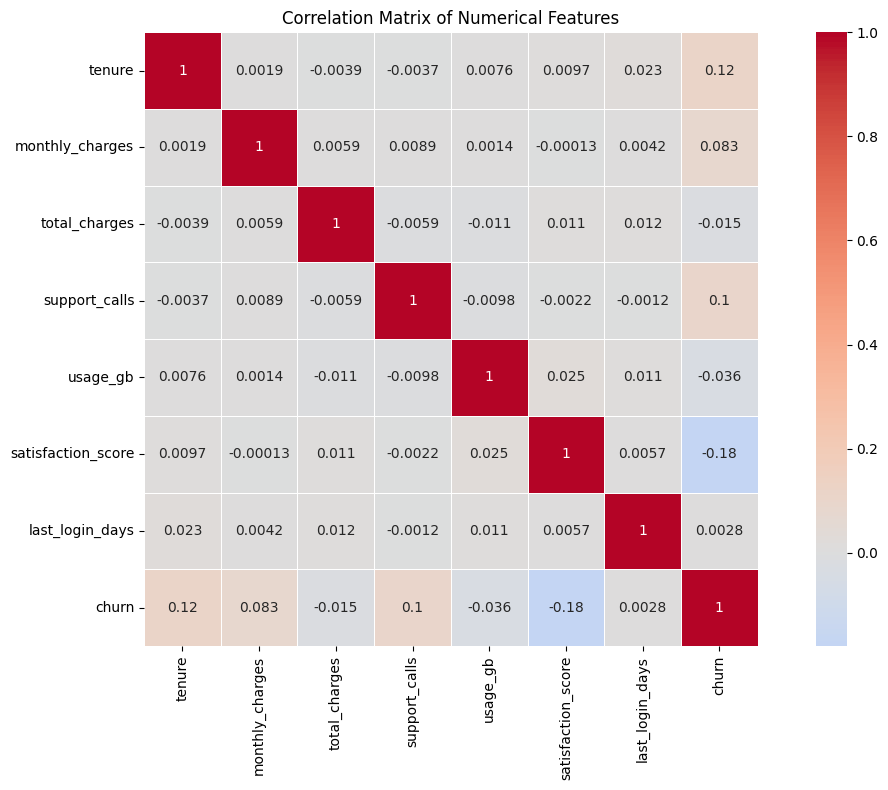


 Feature Distributions...


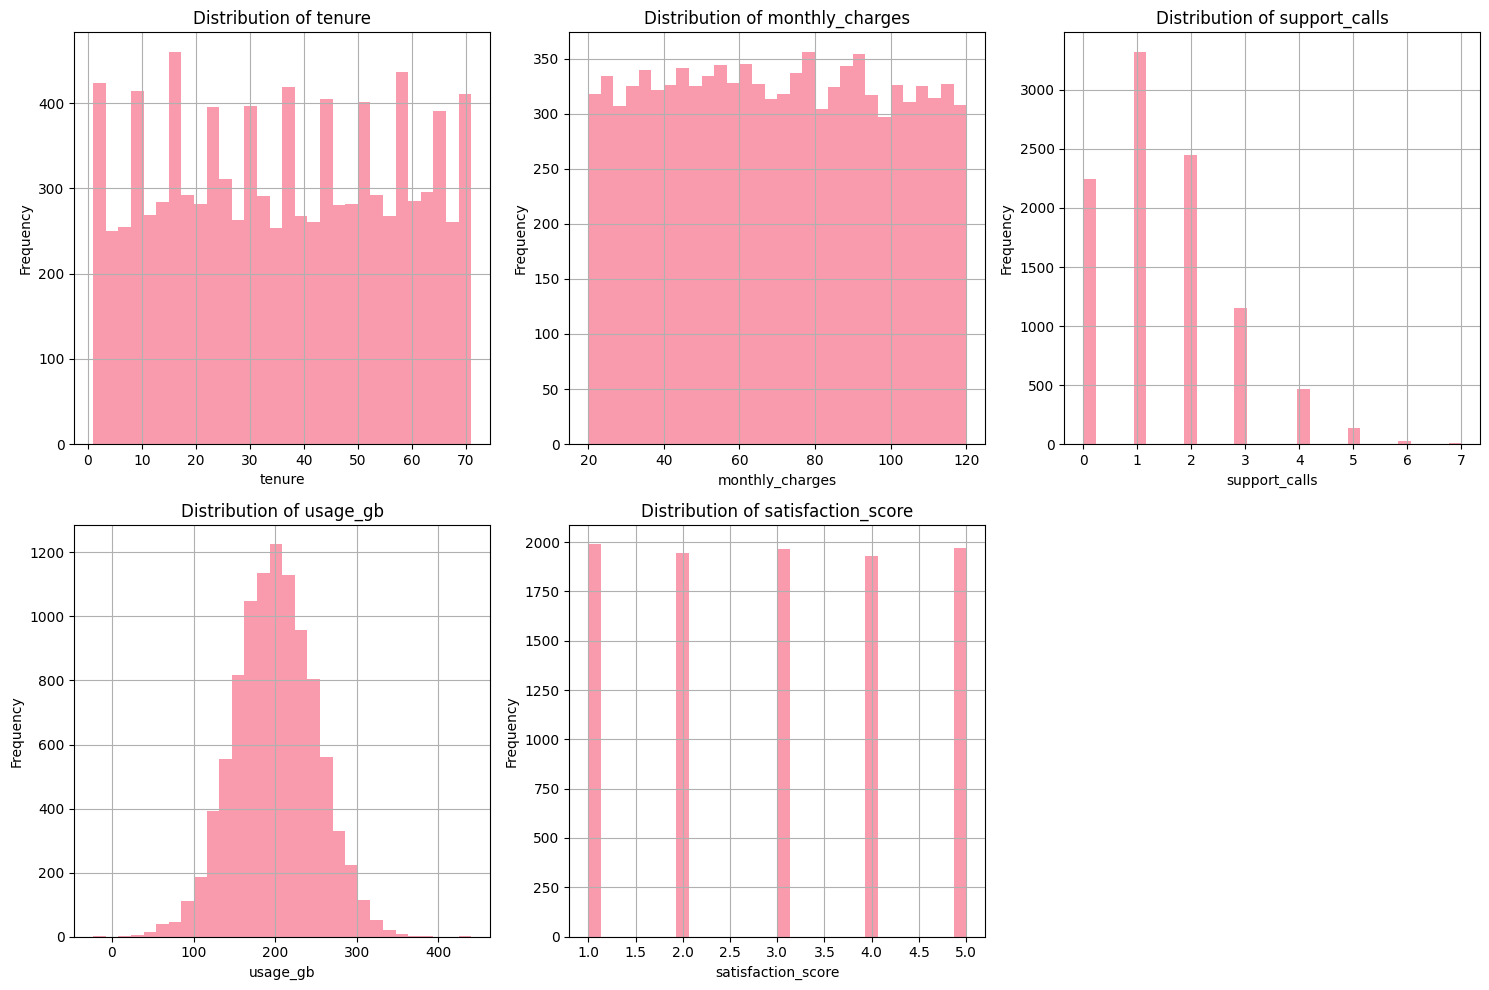


 Handling Class Imbalance...
Original class distribution: {0: 8708, 1: 1177}
Training set size: (7908, 23)
Test set size: (1977, 23)
Training class distribution: {0: 6966, 1: 942}


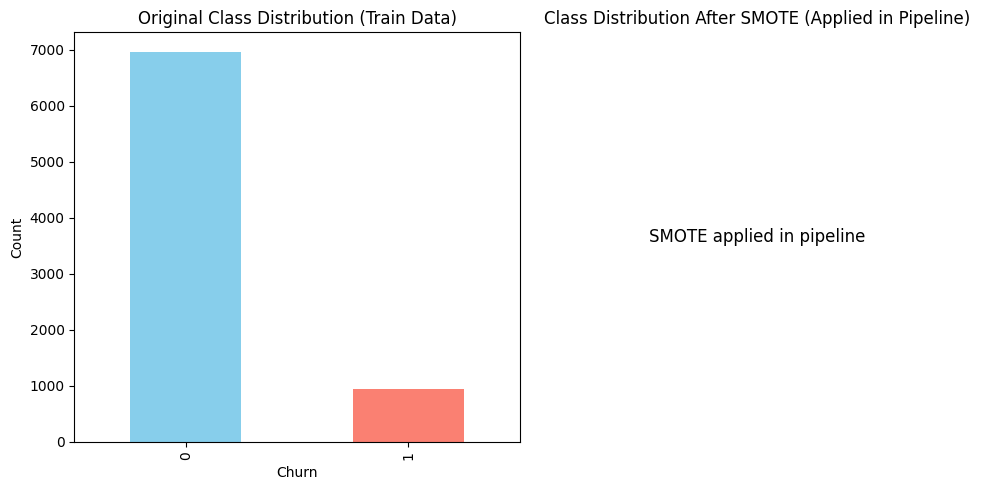


 Training Multiple Models...

Training Logistic Regression...
Logistic Regression trained successfully!
Accuracy: 0.7193
F1-Score: 0.3584
ROC-AUC: 0.7646

Training Decision Tree...
Decision Tree trained successfully!
Accuracy: 0.7916
F1-Score: 0.2454
ROC-AUC: 0.5725

Training Random Forest...
Random Forest trained successfully!
Accuracy: 0.8816
F1-Score: 0.0787
ROC-AUC: 0.7295

Training Gradient Boosting...
Gradient Boosting trained successfully!
Accuracy: 0.8786
F1-Score: 0.2000
ROC-AUC: 0.7572

Training Neural Network...
Neural Network trained successfully!
Accuracy: 0.8225
F1-Score: 0.2419
ROC-AUC: 0.6452

Training SVM...
SVM trained successfully!
Accuracy: 0.8442
F1-Score: 0.2524
ROC-AUC: 0.7065

 Model Comparison...

Model Performance Comparison:
              Model  Accuracy  F1-Score  ROC-AUC
Logistic Regression  0.719272  0.358382 0.764614
  Gradient Boosting  0.878604  0.200000 0.757163
      Random Forest  0.881639  0.078740 0.729544
                SVM  0.844208  0.252427 0

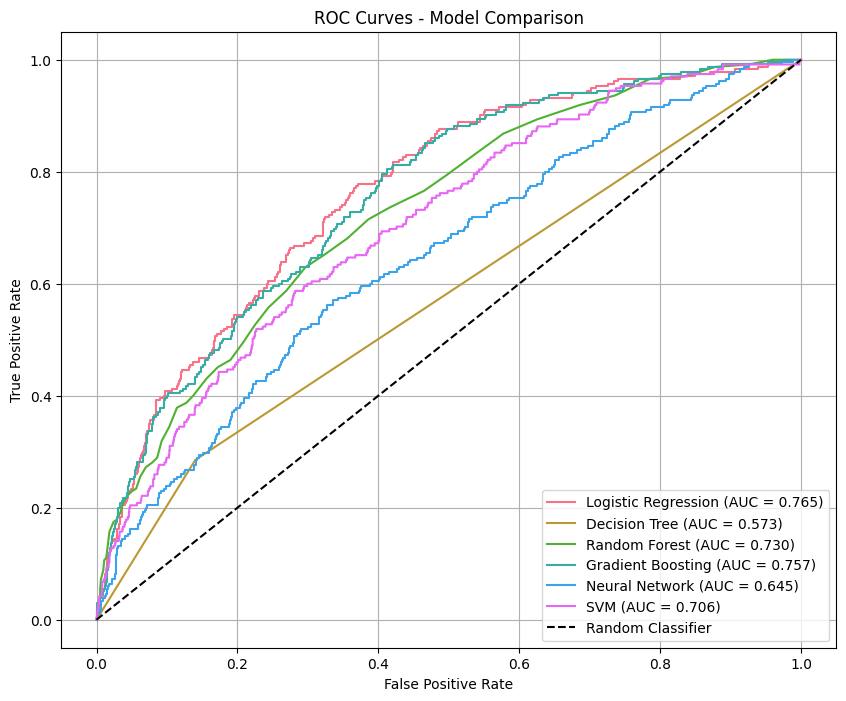

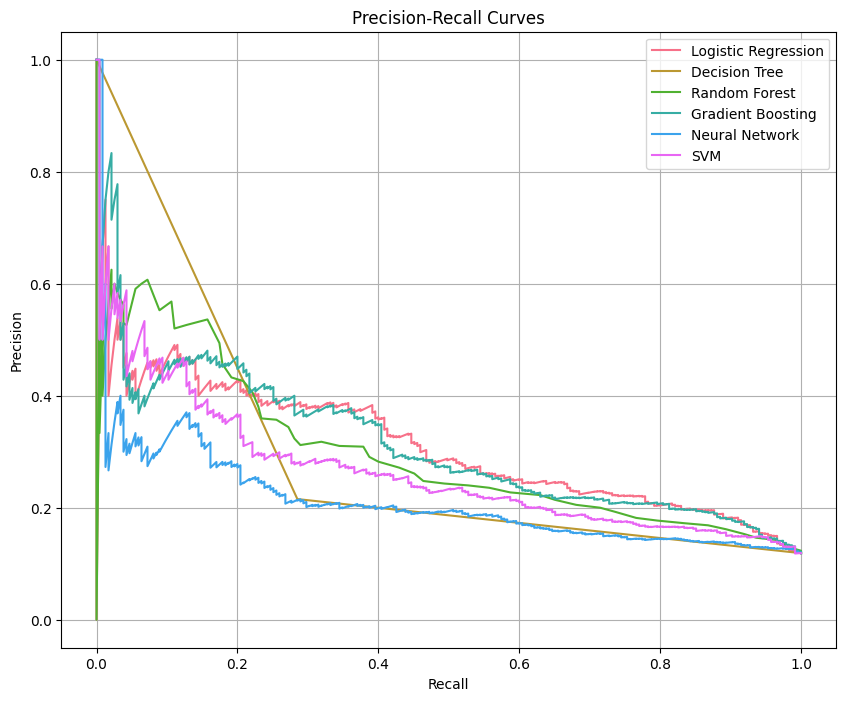


 Best Model Analysis...
Best Model: Logistic Regression
Best ROC-AUC: 0.7646

Detailed Evaluation - Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.73      0.82      1742
           1       0.25      0.66      0.36       235

    accuracy                           0.72      1977
   macro avg       0.59      0.69      0.59      1977
weighted avg       0.86      0.72      0.77      1977



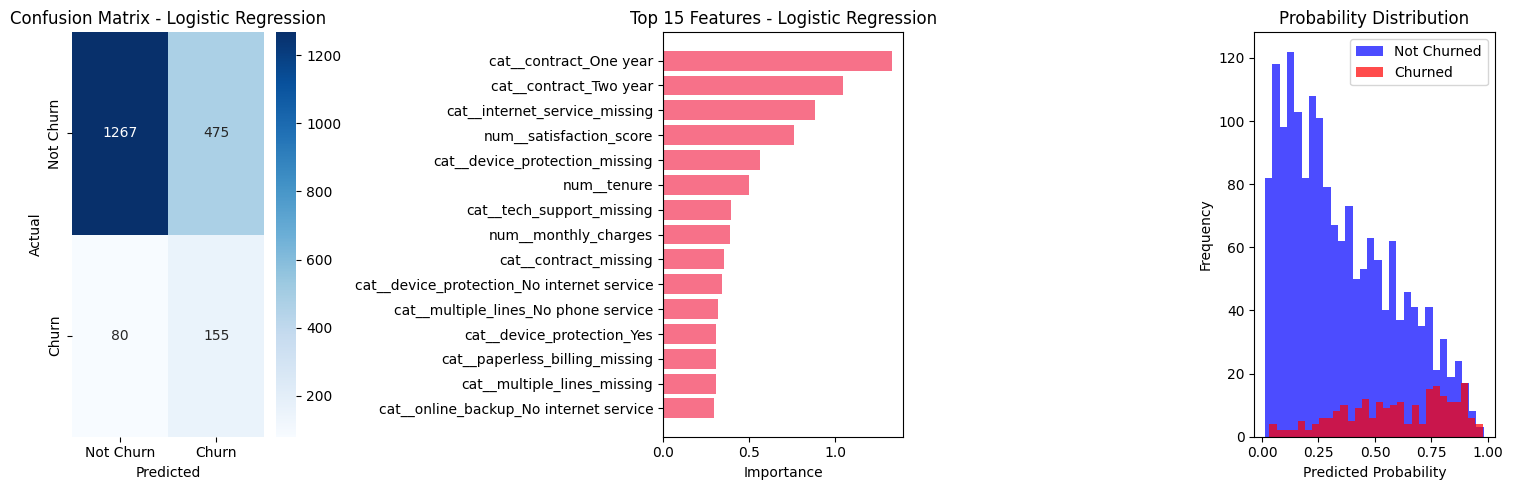


 Business Insights and Recommendations...

 CUSTOMER RISK SEGMENTATION:
High-risk customers (p > 0.7): 284
Medium-risk customers (0.3 < p ≤ 0.7): 780
Low-risk customers (p ≤ 0.3): 913

 HIGH-RISK CUSTOMER PROFILE:
Average tenure: 47.9 months
Average monthly charges: $81.02
Average support calls: 2.0
Average satisfaction score: 1.9/5

Contract distribution in high-risk group:
  One year: 77.0%
  Month-to-month: 22.3%
  Two year: 0.7%

 KEY DRIVERS OF CHURN:
• High support calls: Customers with 3+ support calls
• Month-to-month contracts: More flexible but less committed
• Low satisfaction scores: Scores below 3/5
• High monthly charges: Above average monthly costs
• Short tenure: Less than 12 months
• Electronic check payments: Higher churn correlation

 RETENTION STRATEGY RECOMMENDATIONS:
 Targeted Interventions: Proactive outreach to high-risk customers with personalized offers
 Contract Optimization: Incentivize migration to annual contracts with 10-15% discounts
 Support Enhancemen

In [3]:
# Install required packages
!pip install imbalanced-learn plotly -q

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
# Removed: import scikitplot as skplt

# Scikit-learn imports
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import (classification_report, confusion_matrix,
                             roc_auc_score, precision_recall_curve,
                             roc_curve, f1_score, accuracy_score)

# Imbalanced learning
from imblearn.over_sampling import SMOTE, ADASYN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print(" All packages imported successfully!")


# 1. DATA LOADING AND EXPLORATION


def load_churn_data():
    """
    Load sample churn dataset
    In real scenario, you would load from CSV or database
    """
    # Create a realistic sample dataset
    np.random.seed(42)
    n_customers = 10000

    data = {
        'customer_id': [f'CUST_{i:05d}' for i in range(n_customers)],
        'tenure': np.random.randint(1, 72, n_customers),
        'monthly_charges': np.round(np.random.uniform(20, 120, n_customers), 2),
        'total_charges': np.round(np.random.uniform(50, 5000, n_customers), 2),
        'contract': np.random.choice(['Month-to-month', 'One year', 'Two year'],
                                   n_customers, p=[0.55, 0.30, 0.15]),
        'payment_method': np.random.choice(['Electronic check', 'Mailed check',
                                          'Bank transfer', 'Credit card'],
                                         n_customers),
        'paperless_billing': np.random.choice(['Yes', 'No'], n_customers, p=[0.6, 0.4]),
        'gender': np.random.choice(['Male', 'Female'], n_customers),
        'senior_citizen': np.random.choice([0, 1], n_customers, p=[0.7, 0.3]),
        'partner': np.random.choice(['Yes', 'No'], n_customers, p=[0.5, 0.5]),
        'dependents': np.random.choice(['Yes', 'No'], n_customers, p=[0.3, 0.7]),
        'phone_service': np.random.choice(['Yes', 'No'], n_customers, p=[0.9, 0.1]),
        'multiple_lines': np.random.choice(['Yes', 'No', 'No phone service'],
                                         n_customers, p=[0.4, 0.5, 0.1]),
        'internet_service': np.random.choice(['DSL', 'Fiber optic', 'No'],
                                           n_customers, p=[0.4, 0.4, 0.2]),
        'online_security': np.random.choice(['Yes', 'No', 'No internet service'],
                                          n_customers, p=[0.3, 0.5, 0.2]),
        'online_backup': np.random.choice(['Yes', 'No', 'No internet service'],
                                        n_customers, p=[0.3, 0.5, 0.2]),
        'device_protection': np.random.choice(['Yes', 'No', 'No internet service'],
                                            n_customers, p=[0.3, 0.5, 0.2]),
        'tech_support': np.random.choice(['Yes', 'No', 'No internet service'],
                                       n_customers, p=[0.3, 0.5, 0.2]),
        'streaming_tv': np.random.choice(['Yes', 'No', 'No internet service'],
                                       n_customers, p=[0.4, 0.4, 0.2]),
        'streaming_movies': np.random.choice(['Yes', 'No', 'No internet service'],
                                           n_customers, p=[0.4, 0.4, 0.2]),
        'support_calls': np.random.poisson(1.5, n_customers),
        'usage_gb': np.random.normal(200, 50, n_customers),
        'satisfaction_score': np.random.randint(1, 6, n_customers),
        'last_login_days': np.random.randint(0, 90, n_customers),
    }

    df = pd.DataFrame(data)

    # Create realistic churn probability
    # Customers with month-to-month contracts, high charges, many support calls are more likely to churn
    churn_proba = 1 / (1 + np.exp(-(
        -2.0 +
        0.02 * df['tenure'] +
        0.01 * df['monthly_charges'] +
        0.3 * df['support_calls'] -
        0.5 * df['satisfaction_score'] -
        0.8 * (df['contract'] == 'Month-to-month').astype(int) +
        0.6 * (df['contract'] == 'One year').astype(int) -
        1.2 * (df['contract'] == 'Two year').astype(int) +
        0.4 * (df['payment_method'] == 'Electronic check').astype(int) -
        0.3 * df['usage_gb'] / 100 +
        np.random.normal(0, 0.5, n_customers)
    )))

    df['churn'] = (np.random.random(n_customers) < churn_proba).astype(int)

    # Ensure some missing values for realism
    mask = np.random.random(df.shape) < 0.01
    df = df.mask(mask)

    return df

# Load the data
print(" Loading customer churn data...")
df = load_churn_data()

print(" Data loaded successfully!")
print(f"Dataset shape: {df.shape}")
# print(f"Churn rate: {df['churn'].mean():.2%}") # Moved below for accuracy after dropping NaNs

# Display basic info
print("\n" + "="*50)
print("DATASET OVERVIEW")
print("="*50)
print(df.info())

print("\n" + "="*50)
print("FIRST 5 ROWS")
print("="*50)
print(df.head())



# 2. DATA PREPROCESSING


print("\n Data Preprocessing...")

# Create a copy for preprocessing
df_processed = df.copy()

# Drop customer_id as it's not a feature
df_processed = df_processed.drop('customer_id', axis=1)

# Handle missing values in the target variable 'churn'
df_processed.dropna(subset=['churn'], inplace=True)

# Convert 'churn' column to integer type
df_processed['churn'] = df_processed['churn'].astype(int)

print("\n" + "="*50)
print("CHURN DISTRIBUTION")
print("="*50)
print(df_processed['churn'].value_counts())
print(f"Churn Rate: {df_processed['churn'].mean():.2%}")


# Separate features and target
X = df_processed.drop('churn', axis=1)
y = df_processed['churn']

# Identify feature types
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=[np.number]).columns.tolist()

print(f"\nCategorical features: {categorical_features}")
print(f"Numerical features: {numerical_features}")

# Check for missing values after dropping rows with missing churn
print("\nMissing values after dropping rows with missing churn:")
print(X.isnull().sum())


# Create preprocessing pipelines
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

print(" Preprocessing pipeline created!")


# 3. EXPLORATORY DATA ANALYSIS (EDA) - Moved after preprocessing for cleaner data
print("\n Performing Exploratory Data Analysis...")

# Set style for better visualizations
plt.style.use('default')
sns.set_palette("husl")

# 3.1 Churn Distribution (using processed data)
fig = make_subplots(
    rows=2, cols=3,
    subplot_titles=('Churn Distribution', 'Churn by Contract', 'Churn by Payment Method',
                   'Tenure vs Churn', 'Monthly Charges vs Churn', 'Support Calls vs Churn'),
    specs=[[{"type": "pie"}, {"type": "bar"}, {"type": "bar"}],
           [{"type": "box"}, {"type": "box"}, {"type": "box"}]]
)

# Pie chart for churn distribution
churn_counts = df_processed['churn'].value_counts()
fig.add_trace(
    go.Pie(labels=['Not Churned', 'Churned'], values=churn_counts.values,
           name="Churn Distribution"),
    row=1, col=1
)

# Churn by contract type
contract_churn = pd.crosstab(df_processed['contract'], df_processed['churn'], normalize='index') * 100
fig.add_trace(
    go.Bar(x=contract_churn.index, y=contract_churn[1], name="Churn Rate by Contract"),
    row=1, col=2
)

# Churn by payment method
payment_churn = pd.crosstab(df_processed['payment_method'], df_processed['churn'], normalize='index') * 100
fig.add_trace(
    go.Bar(x=payment_churn.index, y=payment_churn[1], name="Churn Rate by Payment"),
    row=1, col=3
)

# Box plots for numerical features
fig.add_trace(
    go.Box(y=df_processed[df_processed['churn']==0]['tenure'], name='Not Churned', boxpoints=False),
    row=2, col=1
)
fig.add_trace(
    go.Box(y=df_processed[df_processed['churn']==1]['tenure'], name='Churned', boxpoints=False),
    row=2, col=1
)

fig.add_trace(
    go.Box(y=df_processed[df_processed['churn']==0]['monthly_charges'], name='Not Churned', boxpoints=False),
    row=2, col=2
)
fig.add_trace(
    go.Box(y=df_processed[df_processed['churn']==1]['monthly_charges'], name='Churned', boxpoints=False),
    row=2, col=2
)

fig.add_trace(
    go.Box(y=df_processed[df_processed['churn']==0]['support_calls'], name='Not Churned', boxpoints=False),
    row=2, col=3
)
fig.add_trace(
    go.Box(y=df_processed[df_processed['churn']==1]['support_calls'], name='Churned', boxpoints=False),
    row=2, col=3
)


fig.update_layout(height=800, showlegend=False, title_text="Customer Churn Analysis Dashboard")
fig.show()

# 3.2 Correlation Heatmap (Numerical Features)
print("\n Correlation Analysis...")
numerical_features_corr = ['tenure', 'monthly_charges', 'total_charges', 'support_calls',
                     'usage_gb', 'satisfaction_score', 'last_login_days', 'churn']

plt.figure(figsize=(12, 8))
# Ensure only numerical features with no missing values are used for correlation
correlation_matrix = df_processed[numerical_features_corr].dropna().corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5)
plt.title('Correlation Matrix of Numerical Features')
plt.tight_layout()
plt.show()

# 3.3 Feature Distributions
print("\n Feature Distributions...")
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

# Plot distributions for key features
features_to_plot = ['tenure', 'monthly_charges', 'support_calls', 'usage_gb', 'satisfaction_score']
for i, feature in enumerate(features_to_plot):
    # Drop NA for plotting to avoid errors
    df_processed[feature].dropna().hist(bins=30, ax=axes[i], alpha=0.7)
    axes[i].set_title(f'Distribution of {feature}')
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Frequency')

# Remove empty subplot
axes[5].set_visible(False)
plt.tight_layout()
plt.show()


# 4. HANDLE IMBALANCED DATA


print("\n Handling Class Imbalance...")

print(f"Original class distribution: {y.value_counts().to_dict()}")

# Split data before applying SMOTE to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")
print(f"Training class distribution: {y_train.value_counts().to_dict()}")

# Apply SMOTE to training data only
smote = SMOTE(random_state=42)
# SMOTE is applied within the pipeline later to avoid data leakage during cross-validation/grid search

# Visualize class balance (using train data before SMOTE)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
y_train.value_counts().plot(kind='bar', color=['skyblue', 'salmon'])
plt.title('Original Class Distribution (Train Data)')
plt.xlabel('Churn')
plt.ylabel('Count')

# Placeholder for SMOTE visualization (SMOTE will be applied in the pipeline)
plt.subplot(1, 2, 2)
plt.title('Class Distribution After SMOTE (Applied in Pipeline)')
plt.text(0.5, 0.5, 'SMOTE applied in pipeline', horizontalalignment='center', verticalalignment='center', fontsize=12)
plt.axis('off') # Hide axes for placeholder

plt.tight_layout()
plt.show()



# 5. MODEL TRAINING AND EVALUATION


print("\n Training Multiple Models...")

# Define models to train
models = {
    'Logistic Regression': LogisticRegression(random_state=42, max_iter=1000),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'Neural Network': MLPClassifier(random_state=42, max_iter=1000),
    'SVM': SVC(random_state=42, probability=True)
}

# Store results
results = {}
feature_names = [] # To store feature names after preprocessing

# Train and evaluate each model
for name, model in models.items():
    print(f"\n{'='*50}")
    print(f"Training {name}...")
    print(f"{'='*50}")

    # Create pipeline with preprocessing, SMOTE, and model
    pipeline = ImbPipeline([
        ('preprocessor', preprocessor),
        ('smote', SMOTE(random_state=42)), # SMOTE is now part of the pipeline
        ('classifier', model)
    ])

    # Train the model
    pipeline.fit(X_train, y_train)

    # Make predictions
    y_pred = pipeline.predict(X_test)
    y_pred_proba = pipeline.predict_proba(X_test)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    # Store results
    results[name] = {
        'model': pipeline,
        'y_pred': y_pred,
        'y_pred_proba': y_pred_proba,
        'accuracy': accuracy,
        'f1_score': f1,
        'roc_auc': roc_auc
    }

    print(f"{name} trained successfully!")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"F1-Score: {f1:.4f}")
    print(f"ROC-AUC: {roc_auc:.4f}")

    # Get feature names after preprocessing
    if len(feature_names) == 0:
        # Fit the preprocessor on X_train to get feature names
        preprocessor.fit(X_train)
        feature_names = preprocessor.get_feature_names_out()



# 6. MODEL COMPARISON AND VISUALIZATION


print("\n Model Comparison...")

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Model': list(results.keys()),
    'Accuracy': [results[name]['accuracy'] for name in results.keys()],
    'F1-Score': [results[name]['f1_score'] for name in results.keys()],
    'ROC-AUC': [results[name]['roc_auc'] for name in results.keys()]
}).sort_values('ROC-AUC', ascending=False)

print("\nModel Performance Comparison:")
print(comparison_df.to_string(index=False))

# Visualize model comparison
fig = go.Figure(data=[
    go.Bar(name='Accuracy', x=comparison_df['Model'], y=comparison_df['Accuracy']),
    go.Bar(name='F1-Score', x=comparison_df['Model'], y=comparison_df['F1-Score']),
    go.Bar(name='ROC-AUC', x=comparison_df['Model'], y=comparison_df['ROC-AUC'])
])

fig.update_layout(
    title='Model Performance Comparison',
    xaxis_title='Models',
    yaxis_title='Score',
    barmode='group',
    height=500
)
fig.show()

# ROC Curves for all models
plt.figure(figsize=(10, 8))
for name, result in results.items():
    fpr, tpr, _ = roc_curve(y_test, result['y_pred_proba'])
    plt.plot(fpr, tpr, label=f'{name} (AUC = {result["roc_auc"]:.3f})')

plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curves
plt.figure(figsize=(10, 8))
for name, result in results.items():
    precision, recall, _ = precision_recall_curve(y_test, result['y_pred_proba'])
    plt.plot(recall, precision, label=f'{name}')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.grid(True)
plt.show()


# 7. DETAILED ANALYSIS OF BEST MODEL


print("\n Best Model Analysis...")

# Find best model based on ROC-AUC
best_model_name = max(results.keys(), key=lambda x: results[x]['roc_auc'])
best_model = results[best_model_name]['model']

print(f"Best Model: {best_model_name}")
print(f"Best ROC-AUC: {results[best_model_name]['roc_auc']:.4f}")

# Detailed evaluation of best model
y_pred_best = results[best_model_name]['y_pred']
y_pred_proba_best = results[best_model_name]['y_pred_proba']

print(f"\n{'='*50}")
print(f"Detailed Evaluation - {best_model_name}")
print(f"{'='*50}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred_best))

# Confusion Matrix
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Not Churn', 'Churn'],
            yticklabels=['Not Churn', 'Churn'])
plt.title(f'Confusion Matrix - {best_model_name}')
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Feature Importance (if available)
if best_model_name in ['Logistic Regression', 'Random Forest', 'Gradient Boosting', 'Decision Tree']:
    plt.subplot(1, 3, 2)

    if best_model_name == 'Logistic Regression':
        # For Logistic Regression, coefficients are importance
        classifier = best_model.named_steps['classifier']
        if hasattr(classifier, 'coef_'):
            # Ensure feature_names are available
            if len(feature_names) == 0:
                 preprocessor.fit(X_train)
                 feature_names = preprocessor.get_feature_names_out()

            importance = abs(classifier.coef_[0]) # Assuming binary classification

    elif best_model_name in ['Random Forest', 'Gradient Boosting', 'Decision Tree']:
        # For tree-based models, use feature_importances_
        classifier = best_model.named_steps['classifier']
        if hasattr(classifier, 'feature_importances_'):
             # Ensure feature_names are available
            if len(feature_names) == 0:
                 preprocessor.fit(X_train)
                 feature_names = preprocessor.get_feature_names_out()

            importance = classifier.feature_importances_
    else:
        importance = None


    if importance is not None and len(feature_names) == len(importance):
        feature_importance_df = pd.DataFrame({
            'feature': feature_names,
            'importance': importance
        }).sort_values('importance', ascending=True).tail(15) # Display top 15 features

        plt.barh(feature_importance_df['feature'], feature_importance_df['importance'])
        plt.title(f'Top 15 Features - {best_model_name}')
        plt.xlabel('Importance')
        plt.tight_layout() # Adjust layout

# Probability distribution
plt.subplot(1, 3, 3)
plt.hist(y_pred_proba_best[y_test == 0], bins=30, alpha=0.7, label='Not Churned', color='blue')
plt.hist(y_pred_proba_best[y_test == 1], bins=30, alpha=0.7, label='Churned', color='red')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Probability Distribution')
plt.legend()

plt.tight_layout()
plt.show()


# 8. BUSINESS INSIGHTS AND RECOMMENDATIONS


print("\n Business Insights and Recommendations...")

# Identify high-risk customers
test_with_predictions = X_test.copy()
test_with_predictions['churn_probability'] = y_pred_proba_best
test_with_predictions['actual_churn'] = y_test.values
test_with_predictions['predicted_churn'] = y_pred_best

# High-risk customers (probability > 0.7)
high_risk_customers = test_with_predictions[test_with_predictions['churn_probability'] > 0.7]
medium_risk_customers = test_with_predictions[
    (test_with_predictions['churn_probability'] > 0.3) &
    (test_with_predictions['churn_probability'] <= 0.7)
]

print(f"\n CUSTOMER RISK SEGMENTATION:")
print(f"{'='*50}")
print(f"High-risk customers (p > 0.7): {len(high_risk_customers):,}")
print(f"Medium-risk customers (0.3 < p ≤ 0.7): {len(medium_risk_customers):,}")
print(f"Low-risk customers (p ≤ 0.3): {len(test_with_predictions) - len(high_risk_customers) - len(medium_risk_customers):,}")

if len(high_risk_customers) > 0:
    print(f"\n HIGH-RISK CUSTOMER PROFILE:")
    print(f"{'='*50}")
    print(f"Average tenure: {high_risk_customers['tenure'].mean():.1f} months")
    print(f"Average monthly charges: ${high_risk_customers['monthly_charges'].mean():.2f}")
    print(f"Average support calls: {high_risk_customers['support_calls'].mean():.1f}")
    print(f"Average satisfaction score: {high_risk_customers['satisfaction_score'].mean():.1f}/5")

    # Contract distribution in high-risk group
    contract_dist = high_risk_customers['contract'].value_counts(normalize=True) * 100
    print(f"\nContract distribution in high-risk group:")
    for contract, percentage in contract_dist.items():
        print(f"  {contract}: {percentage:.1f}%")

# Key drivers of churn
print(f"\n KEY DRIVERS OF CHURN:")
print(f"{'='*50}")

drivers = [
    ("High support calls", "Customers with 3+ support calls"),
    ("Month-to-month contracts", "More flexible but less committed"),
    ("Low satisfaction scores", "Scores below 3/5"),
    ("High monthly charges", "Above average monthly costs"),
    ("Short tenure", "Less than 12 months"),
    ("Electronic check payments", "Higher churn correlation")
]

for driver, explanation in drivers:
    print(f"• {driver}: {explanation}")

# Retention recommendations
print(f"\n RETENTION STRATEGY RECOMMENDATIONS:")
print(f"{'='*50}")

recommendations = [
    (" Targeted Interventions", "Proactive outreach to high-risk customers with personalized offers"),
    (" Contract Optimization", "Incentivize migration to annual contracts with 10-15% discounts"),
    (" Support Enhancement", "Implement proactive support and self-service options"),
    (" Pricing Strategy", "Loyalty discounts for long-term customers"),
    (" Satisfaction Improvement", "Regular feedback collection and quick issue resolution"),
    (" Monitoring System", "Real-time churn prediction dashboard with alerts")
]

for category, recommendation in recommendations:
    print(f"{category}: {recommendation}")


# 9. PREDICTION ON NEW CUSTOMERS


print("\n🔮 Predicting Churn for New Customers...")

# Sample new customers for prediction
def create_sample_customers():
    """Create sample new customers for prediction demonstration"""
    sample_data = {
        'tenure': [5, 24, 36, 2, 48],
        'monthly_charges': [85.50, 45.20, 120.75, 95.30, 35.80],
        'total_charges': [427.50, 1084.80, 4347.00, 190.60, 1718.40],
        'contract': ['Month-to-month', 'One year', 'Two year', 'Month-to-month', 'Two year'],
        'payment_method': ['Electronic check', 'Bank transfer', 'Credit card', 'Electronic check', 'Bank transfer'],
        'paperless_billing': ['Yes', 'No', 'Yes', 'Yes', 'No'],
        'gender': ['Male', 'Female', 'Male', 'Female', 'Male'],
        'senior_citizen': [0, 0, 1, 0, 0],
        'partner': ['No', 'Yes', 'Yes', 'No', 'Yes'],
        'dependents': ['No', 'Yes', 'Yes', 'No', 'No'],
        'phone_service': ['Yes', 'Yes', 'Yes', 'Yes', 'Yes'],
        'multiple_lines': ['Yes', 'No', 'Yes', 'Yes', 'No'],
        'internet_service': ['Fiber optic', 'DSL', 'Fiber optic', 'Fiber optic', 'DSL'],
        'online_security': ['No', 'Yes', 'Yes', 'No', 'Yes'],
        'online_backup': ['No', 'Yes', 'No', 'No', 'Yes'],
        'device_protection': ['No', 'Yes', 'Yes', 'No', 'Yes'],
        'tech_support': ['No', 'Yes', 'Yes', 'No', 'Yes'],
        'streaming_tv': ['Yes', 'No', 'Yes', 'Yes', 'No'],
        'streaming_movies': ['Yes', 'No', 'Yes', 'Yes', 'No'],
        'support_calls': [4, 1, 0, 3, 1],
        'usage_gb': [280, 150, 320, 260, 120],
        'satisfaction_score': [2, 5, 4, 3, 5],
        'last_login_days': [25, 5, 2, 30, 3]
    }
    return pd.DataFrame(sample_data)

# Create sample new customers
new_customers = create_sample_customers()
print("Sample new customers for prediction:")
print(new_customers)

# Predict churn probability for new customers
new_customers_churn_proba = best_model.predict_proba(new_customers)[:, 1]
new_customers['churn_probability'] = new_customers_churn_proba
new_customers['risk_level'] = pd.cut(new_customers_churn_proba,
                                    bins=[0, 0.3, 0.7, 1],
                                    labels=['Low', 'Medium', 'High'])

print(f"\n PREDICTION RESULTS FOR NEW CUSTOMERS:")
print(f"{'='*50}")
for i, (idx, row) in enumerate(new_customers.iterrows()):
    print(f"Customer {i+1}:")
    print(f"  • Tenure: {row['tenure']} months")
    print(f"  • Contract: {row['contract']}")
    f"  • Monthly Charges: ${row['monthly_charges']:.2f}"
    print(f"  • Support Calls: {row['support_calls']}")
    print(f"  • Churn Probability: {row['churn_probability']:.1%}")
    print(f"  • Risk Level: {row['risk_level']}")
    print()


# 10. MODEL DEPLOYMENT PREPARATION


print("\n Model Deployment Preparation...")

# Save the best model
import joblib

# Save the model
model_filename = 'best_churn_model.pkl'
joblib.dump(best_model, model_filename)
print(f" Best model saved as '{model_filename}'")

# Create a simple prediction function
def predict_churn_single(customer_data, model=best_model):
    """
    Predict churn probability for a single customer

    Parameters:
    customer_data (dict): Dictionary containing customer features
    model: Trained model pipeline

    Returns:
    dict: Prediction results
    """
    # Convert to DataFrame
    customer_df = pd.DataFrame([customer_data])

    # Predict
    churn_probability = model.predict_proba(customer_df)[0, 1]
    churn_prediction = model.predict(customer_df)[0]

    # Determine risk level
    if churn_probability < 0.3:
        risk_level = "Low"
    elif churn_probability < 0.7:
        risk_level = "Medium"
    else:
        risk_level = "High"

    return {
        'churn_probability': float(churn_probability),
        'churn_prediction': int(churn_prediction),
        'risk_level': risk_level,
        'recommendation': f"Customer has {risk_level} risk of churning"
    }

# Test the prediction function
sample_customer = {
    'tenure': 6,
    'monthly_charges': 89.99,
    'total_charges': 539.94,
    'contract': 'Month-to-month',
    'payment_method': 'Electronic check',
    'paperless_billing': 'Yes',
    'gender': 'Female',
    'senior_citizen': 0,
    'partner': 'No',
    'dependents': 'No',
    'phone_service': 'Yes',
    'multiple_lines': 'Yes',
    'internet_service': 'Fiber optic',
    'online_security': 'No',
    'online_backup': 'No',
    'device_protection': 'No',
    'tech_support': 'No',
    'streaming_tv': 'Yes',
    'streaming_movies': 'Yes',
    'support_calls': 3,
    'usage_gb': 275,
    'satisfaction_score': 2,
    'last_login_days': 15
}

print(" Testing Prediction Function:")
prediction_result = predict_churn_single(sample_customer)
for key, value in prediction_result.items():
    print(f"  {key}: {value}")

for step, description in summary_points:
    print(f"{step}: {description}")

print(f"\n BEST MODEL: {best_model_name}")
print(f" PERFORMANCE: ROC-AUC = {results[best_model_name]['roc_auc']:.4f}")

